# **Actividad 5: Uso de software para búsqueda.**

Andrea Verónica Moreno España  2109443  *IMTC*


*   Gpo: 008
*   Hora: N4

In [19]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [23]:
#Importar datos
mnist_data = tf.keras.datasets.mnist.load_data(path="mnist.npz")
(train_images, train_labels), (test_images, test_labels) = mnist_data

In [44]:
#Etiquetas
class_names = ['Zero','One', 'Two', 'Three', 'Four',
               'Five', 'Six', 'Seven', 'Eight', 'Nine']

In [25]:
#Explorar datos
train_images.shape
len(train_labels)
train_labels
test_images.shape
len(test_labels)

10000

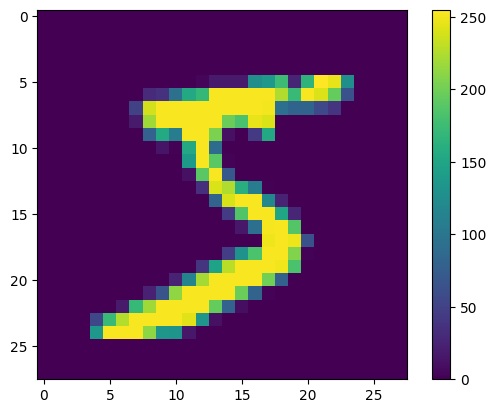

In [26]:
#Preprocesamiento
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [27]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [17]:
#Generar modelo
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)])

In [28]:
#Compilar modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
#Cargar modelo
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2579 - accuracy: 0.9253
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1124 - accuracy: 0.9664
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0790 - accuracy: 0.9762
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0595 - accuracy: 0.9814
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0462 - accuracy: 0.9855
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0362 - accuracy: 0.9886
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0295 - accuracy: 0.9904
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0232 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0209 - accuracy: 0.9934
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.

In [31]:
#Precisión
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.0892 - accuracy: 0.9771 - 2s/epoch - 5ms/step

Test accuracy: 0.9771000146865845


In [32]:
#Predicciones
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [34]:
predictions[0]

array([1.26829780e-09, 1.80172002e-10, 3.08527405e-07, 3.47185346e-06,
       4.14959831e-15, 5.49318813e-10, 1.17710944e-17, 9.99996006e-01,
       1.43557735e-10, 7.16484507e-08], dtype=float32)

In [35]:
np.argmax(predictions[0])

7

In [36]:
test_labels[0]

7

In [37]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

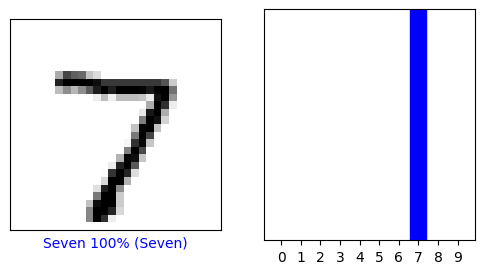

In [45]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

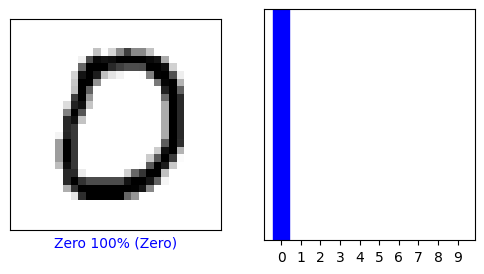

In [46]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

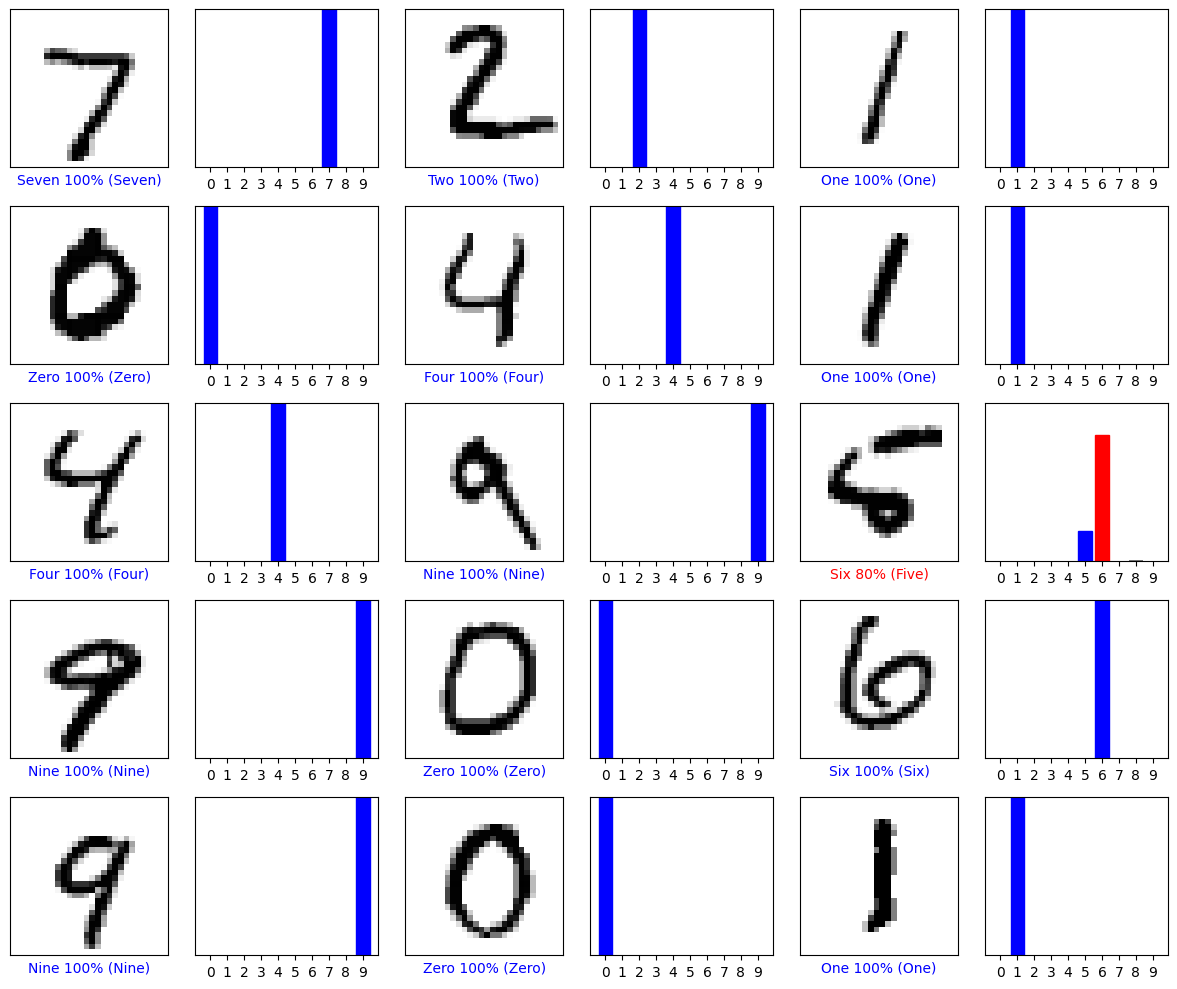

In [47]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [48]:
#Modelo entrenado
img = test_images[1]

print(img.shape)

(28, 28)


In [49]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [50]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 21ms/step
[[3.16419078e-11 7.45035962e-08 9.99999881e-01 2.97314307e-09
  9.25647999e-20 2.90767618e-11 8.74523093e-11 1.98132206e-17
  1.04788871e-08 1.05351725e-17]]


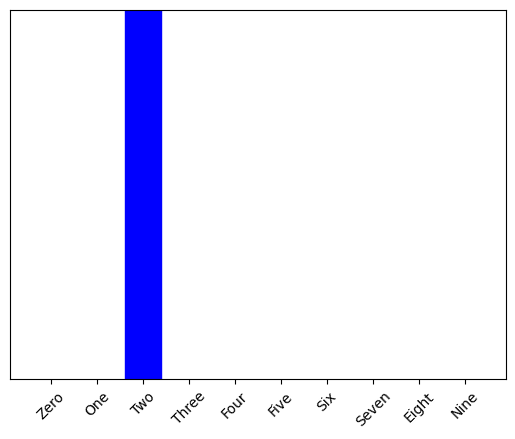

In [51]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [52]:
np.argmax(predictions_single[0])

2